In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
# Load dataset
df = pd.read_csv("Harry Potter 2.csv")

# Create a new column for sentiment
df['sentiment'] = df['Sentence'].apply(lambda x: TextBlob(x).sentiment[0])

# Create a new column for sentiment label
df['sentiment_label'] = ''

# Assign sentiment labels based on polarity
df.loc[df['sentiment'] > 0, 'sentiment_label'] = 'Positive'
df.loc[df['sentiment'] == 0, 'sentiment_label'] = 'Neutral'
df.loc[df['sentiment'] < 0, 'sentiment_label'] = 'Negative'

# Print the first 5 rows of the updated dataset
print(df.head())

  Character                                          Sentence  Sentiment  \
0    HARRY                      I can’t let you out, Hedwig.         NaN   
1    HARRY   I’m not allowed to use magic outside of school.         NaN   
2    HARRY                          Besides, if Uncle Vernon…        NaN   
3    VERNON                                     Harry Potter!        NaN   
4     HARRY                               Now you’ve done it.        NaN   

   sentiment sentiment_label  
0       0.00         Neutral  
1       0.25        Positive  
2       0.00         Neutral  
3       0.00         Neutral  
4       0.00         Neutral  


In [17]:
df['Sentence'] = df['Sentence'].str.replace('[^a-zA-Z]', ' ')
df['Sentence'] = df['Sentence'].str.lower()
df.head()

/var/folders/tz/k4y848sd56d7b57921hs2bfm0000gn/T/ipykernel_67412/4021358668.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace('[^a-zA-Z]', ' ')


,Character,Sentence,Sentiment,sentiment,sentiment_label
0,HARRY,i can t let you out hedwig,NaN,0.00,Neutral
1,HARRY,i m not allowed to use magic outside of school,NaN,0.25,Positive
2,HARRY,besides if uncle vernon,NaN,0.00,Neutral
3,VERNON,harry potter,NaN,0.00,Neutral
4,HARRY,now you ve done it,NaN,0.00,Neutral


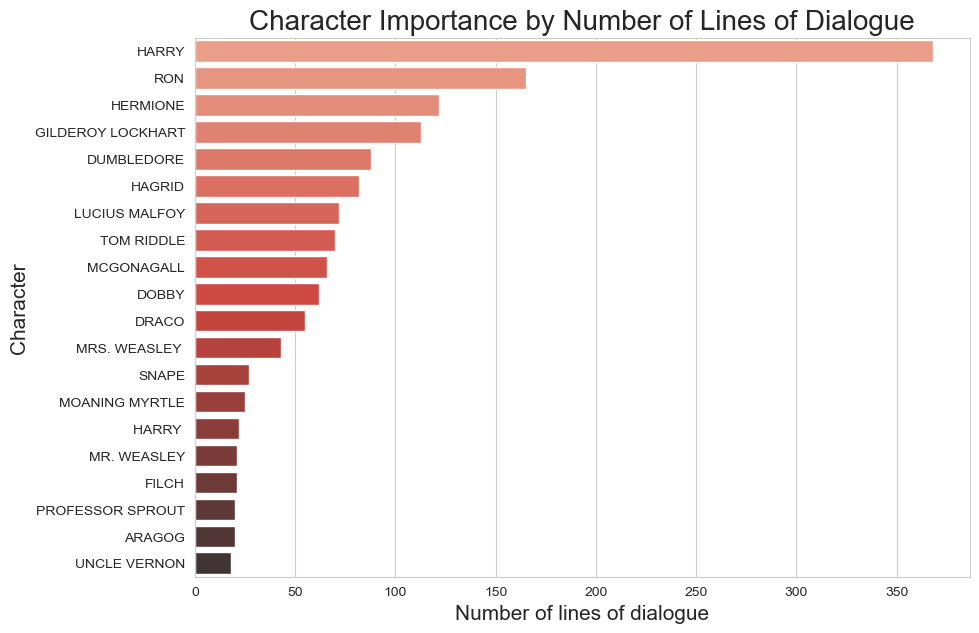

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(y='Character', data=df, order=df.Character.value_counts().iloc[:20].index, palette="Reds_d")
plt.xlabel('Number of lines of dialogue', fontsize=15)
plt.ylabel('Character', fontsize=15)
plt.title('Character Importance by Number of Lines of Dialogue', fontsize=20)
plt.show()

In [19]:
from collections import Counter
all_text = " ".join(text for text in df['Sentence'])
words = all_text.split()
word_counts = Counter(words)
print(word_counts.most_common(8))

[('you', 451), ('the', 331), ('i', 325), ('to', 264), ('it', 239), ('s', 227), ('of', 188), ('t', 162)]


In [20]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Define a function to clean the text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove symbols
    text = re.sub(r'[^\w\s]','',text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a single string
    cleaned_text = " ".join(filtered_words)
    return cleaned_text

# Clean the text column
df['Sentence'] = df['Sentence'].apply(clean_text)

[nltk_data] Error loading stopwords: <urlopen error [Errno 60]
[nltk_data]     Operation timed out>


In [21]:
common_words = Counter(" ".join(df["Sentence"]).split()).most_common(10)
common_words

[('harry', 102),
 ('dobby', 60),
 ('go', 57),
 ('potter', 55),
 ('come', 55),
 ('think', 44),
 ('sir', 42),
 ('hagrid', 42),
 ('well', 39),
 ('know', 39)]

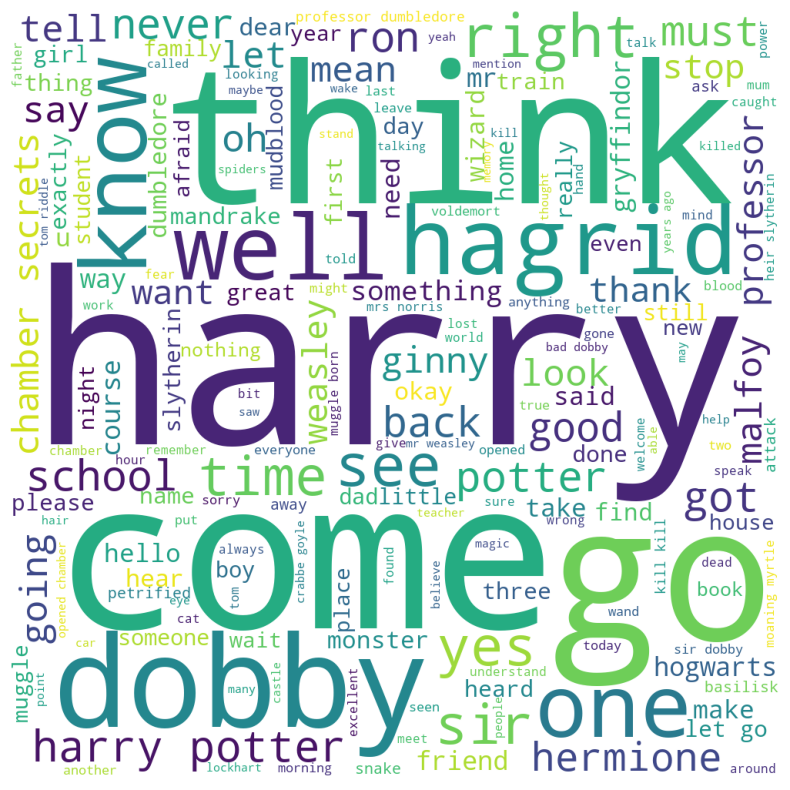

In [22]:
from wordcloud import WordCloud
text = " ".join(line for line in df["Sentence"])
wordcloud = WordCloud(width=1000, height=1000, background_color="white", min_font_size=15).generate(text)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [23]:
df['sentiment_label'].value_counts()['Positive']

322

In [24]:
df['sentiment_label'].value_counts()['Neutral']

1175

In [25]:
df['sentiment_label'].value_counts()['Negative']

203

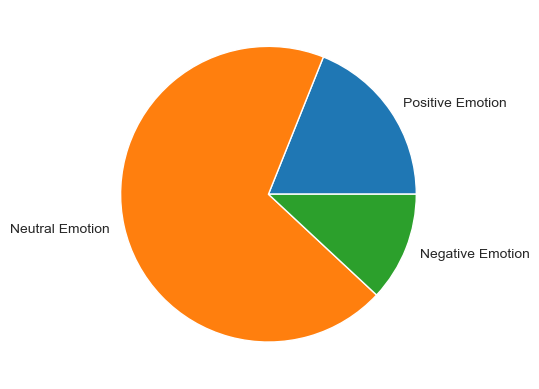

In [26]:
y = np.array([322,1175,203])
mylabels = ["Positive Emotion", "Neutral Emotion", "Negative Emotion"]

plt.pie(y, labels = mylabels)
plt.show() 

In [27]:
# Extract the text data
text_data = df['Sentence'].tolist()

# Tokenize the text data
tokens = [word_tokenize(text) for text in text_data]

# View the tokens
print(tokens)

[['let', 'hedwig'], ['allowed', 'use', 'magic', 'outside', 'school'], ['besides', 'uncle', 'vernon'], ['harry', 'potter'], ['done'], ['vernon'], ['warning', 'control', 'bloody', 'bird', 'go'], ['bored'], ['could', 'let', 'hour', 'two'], ['huh', 'huh', 'could', 'send', 'secret', 'messages', 'freaky', 'little', 'friends', 'sir'], ['messages', 'friends', 'one', 'summer'], ['want', 'friends'], ['think', 'little', 'grateful'], ['raised', 'since', 'baby', 'given', 'food', 'table', 'even', 'let', 'dudley', 'second', 'bedroom', 'purely', 'goodness', 'hearts'], ['pupkins', 'masons', 'arrive'], ['minute'], ['ahem', 'let', 'go', 'schedule', 'shall'], ['petunia', 'masons', 'arrive'], ['lounge', 'waiting', 'welcome', 'graciously', 'home'], ['good', 'dudley'], ['waiting', 'open', 'door'], ['excellent'], ['bedroom', 'making', 'noise', 'pretending', 'exist'], ['right'], ['luck', 'could', 'well', 'day', 'make', 'biggest', 'deal', 'career'], ['mess'], ['mr', 'mrs', 'mason', 'come'], ['ha', 'ha', 'ha', '

In [28]:
# Extract the text data
text_data = df['Sentence'].tolist()

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
vectors = vectorizer.fit_transform(text_data)

# View the vocabulary
print(vectorizer.vocabulary_)

# View the vectorized data
print(vectors.toarray())

{'let': 805, 'hedwig': 682, 'allowed': 43, 'use': 1537, 'magic': 849, 'outside': 1010, 'school': 1232, 'besides': 136, 'uncle': 1519, 'vernon': 1547, 'harry': 664, 'potter': 1084, 'done': 386, 'warning': 1571, 'control': 288, 'bloody': 156, 'bird': 144, 'go': 607, 'bored': 168, 'could': 297, 'hour': 716, 'two': 1511, 'huh': 722, 'send': 1252, 'secret': 1241, 'messages': 898, 'freaky': 562, 'little': 821, 'friends': 570, 'sir': 1302, 'one': 997, 'summer': 1399, 'want': 1565, 'think': 1451, 'grateful': 630, 'raised': 1143, 'since': 1300, 'baby': 108, 'given': 602, 'food': 543, 'table': 1413, 'even': 442, 'dudley': 401, 'second': 1239, 'bedroom': 123, 'purely': 1130, 'goodness': 618, 'hearts': 680, 'pupkins': 1127, 'masons': 870, 'arrive': 77, 'minute': 911, 'ahem': 35, 'schedule': 1231, 'shall': 1275, 'petunia': 1044, 'lounge': 838, 'waiting': 1557, 'welcome': 1585, 'graciously': 623, 'home': 704, 'good': 616, 'open': 1002, 'door': 388, 'excellent': 456, 'making': 854, 'noise': 973, 'pre